In [2]:
# 0. 전처리

from tensorflow import keras

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 1.

from sklearn.model_selection import train_test_split

train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [6]:
print(train_scaled.shape)
print(val_scaled.shape)

(45000, 28, 28)
(15000, 28, 28)


In [9]:
# 2. 신경망 ,모델 층 만드는 함수

def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))

  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [10]:
# 3.

model = model_fn()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# 4.1 몇번 학습할지 (epochs)

model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

result = model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8927 - loss: 0.2997
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9033 - loss: 0.2779
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8989 - loss: 0.2809
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9031 - loss: 0.2730
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9058 - loss: 0.2673


In [16]:
# 5. history 값 확인

result.history.keys()

dict_keys(['accuracy', 'loss'])

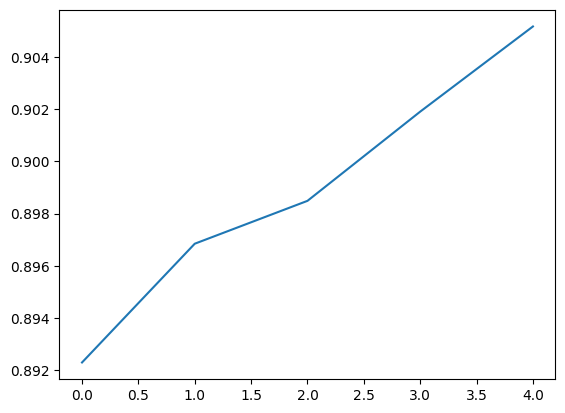

In [19]:
# 6. 정확성, 손실 시각화

import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'])     # 정확도가 높아지고 있음.          # 0~4까지 5번 (x축)

# plt.plot(result.history['loss'])

In [20]:
# 4.2 학습 반복수를 올렸을때 성능도 좋아질까?

result = model.fit(train_scaled, train_target, epochs = 20)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9074 - loss: 0.2591
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9093 - loss: 0.2576
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9133 - loss: 0.2504
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9144 - loss: 0.2425
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9158 - loss: 0.2401
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9166 - loss: 0.2366
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9189 - loss: 0.2309
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9218 - loss: 0.2263
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9231 - loss: 0.2238
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9257 - loss: 0.2120
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9276 - loss: 0.2124
Epoch 12/20
1407/1407 ━━━━━━━━

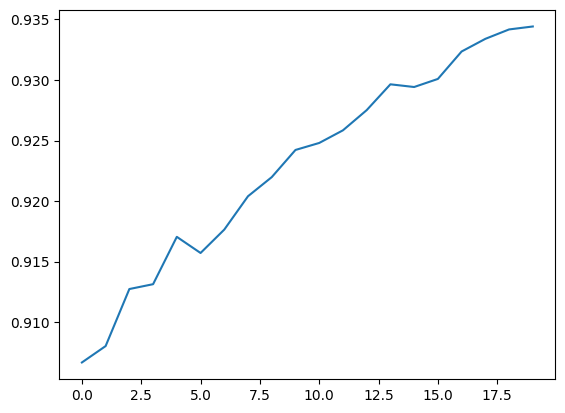

In [23]:
plt.plot(result.history['accuracy'])             # train_scaled에만 맞는 과대적합 이루어짐.
#plt.plot(result.history['loss'])

In [25]:
## 4.3

model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

result = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7662 - loss: 0.6805 - val_accuracy: 0.8221 - val_loss: 0.4774
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8517 - loss: 0.4089 - val_accuracy: 0.8273 - val_loss: 0.4935
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8707 - loss: 0.3559 - val_accuracy: 0.8585 - val_loss: 0.4051
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8800 - loss: 0.3377 - val_accuracy: 0.8789 - val_loss: 0.3466
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8858 - loss: 0.3243 - val_accuracy: 0.8705 - val_loss: 0.3665
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8905 - loss: 0.3116 - val_accuracy: 0.8768 - val_loss: 0.3730
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8947 - loss: 0.2967 - val_accuracy: 0.8776 - val_loss: 0.3777
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8980 - loss: 0.2855 - 

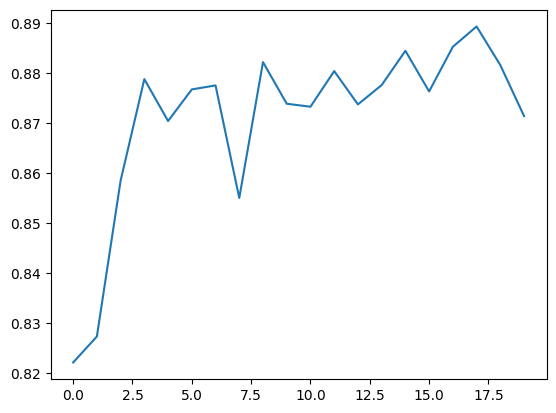

In [30]:
plt.plot(result.history['val_accuracy'])               # 손실율 --> 과대적합 / 들쭉날쭉 하지 않는 것이 목표

In [31]:
## 4.4 과대적합 x 옵티마이저 지정

In [33]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7671 - loss: 0.6746 - val_accuracy: 0.8480 - val_loss: 0.4350
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8538 - loss: 0.4090 - val_accuracy: 0.8589 - val_loss: 0.3862
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8718 - loss: 0.3530 - val_accuracy: 0.8675 - val_loss: 0.3698
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8774 - loss: 0.3348 - val_accuracy: 0.8748 - val_loss: 0.3486
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8851 - loss: 0.3107 - val_accuracy: 0.8812 - val_loss: 0.3321
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8931 - loss: 0.2901 - val_accuracy: 0.8833 - val_loss: 0.3290
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8972 - loss: 0.2767 - val_accuracy: 0.8849 - val_loss: 0.3172
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9043 - loss: 0.2597 - 

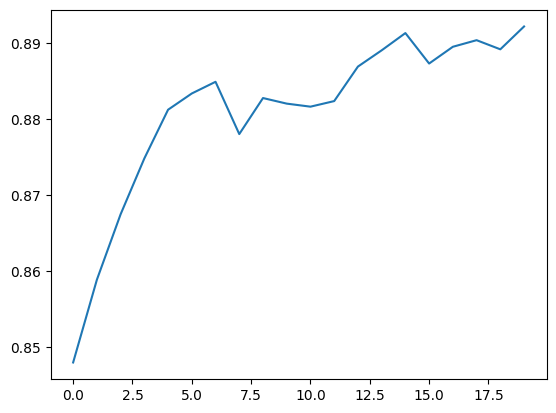

In [37]:
plt.plot(history.history['val_accuracy'])

### 4.5 규제
- dropout : 층을 뺐는데도 성능에 차이가 없으면 중요하지 않은 층 / 성능에 차이가 있으면 중요한 층!

In [38]:
model = model_fn(keras.layers.Dropout(0.3))       # 30퍼센트의 층을 드롭아웃
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
result = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7272 - loss: 0.7829 - val_accuracy: 0.8497 - val_loss: 0.4314
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8326 - loss: 0.4654 - val_accuracy: 0.8530 - val_loss: 0.3982
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8506 - loss: 0.4120 - val_accuracy: 0.8652 - val_loss: 0.3716
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8608 - loss: 0.3854 - val_accuracy: 0.8684 - val_loss: 0.3634
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8650 - loss: 0.3788 - val_accuracy: 0.8757 - val_loss: 0.3490
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8669 - loss: 0.3588 - val_accuracy: 0.8667 - val_loss: 0.3565
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8712 - loss: 0.3497 - val_accuracy: 0.8739 - val_loss: 0.3453
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8744 - loss: 0.3389 - 

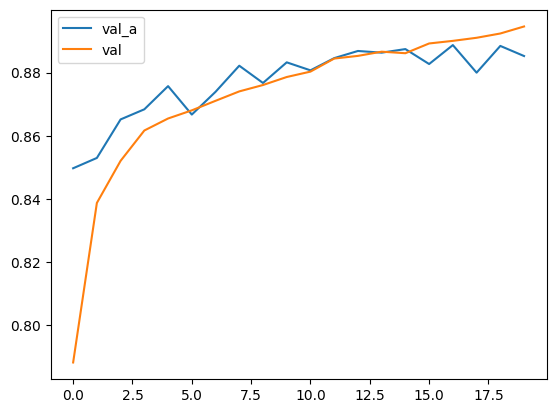

In [42]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])
plt.legend(['val_a', 'val'])

In [43]:
model.save_weights('my_model.weights.h5')

In [44]:
model.save('my_model.keras')

In [45]:
## 데이터 불러오기
# model.load_weights('my_model.weights.h5')

### 콜백
- 이전 상태를 계속 기억

#### 조기종료
- `EarlyStopping(patience=2)` : 2번 연속 검증 점수가 향상되지 않으면 훈련 정지

In [51]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cp = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only = True)         # 베스트값만 저장하겠다
es = keras.callbacks.EarlyStopping(patience=2)
result = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [cp,es])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7225 - loss: 0.7942 - val_accuracy: 0.8491 - val_loss: 0.4235
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8344 - loss: 0.4577 - val_accuracy: 0.8511 - val_loss: 0.4034
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8520 - loss: 0.4059 - val_accuracy: 0.8679 - val_loss: 0.3653
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8573 - loss: 0.3822 - val_accuracy: 0.8706 - val_loss: 0.3524
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8624 - loss: 0.3710 - val_accuracy: 0.8748 - val_loss: 0.3479
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8701 - loss: 0.3492 - val_accuracy: 0.8765 - val_loss: 0.3375
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8726 - loss: 0.3449 - val_accuracy: 0.8809 - val_loss: 0.3291
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8766 - loss: 0.3332 - 

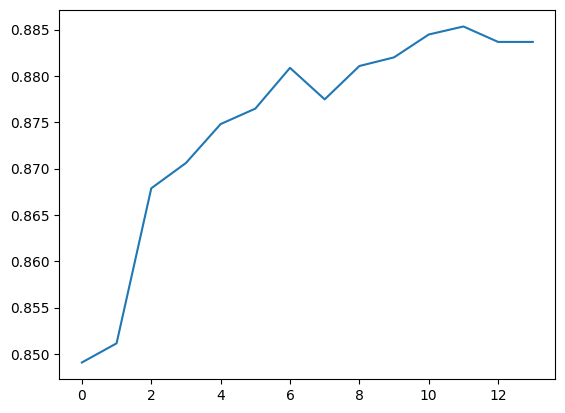

In [53]:
plt.plot(result.history['val_accuracy'])